In [18]:
from shapely import wkt
from shapely.geometry import Polygon
import h3
from pathlib import Path
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx

In [2]:
def hex_to_poly(hex_id: str) -> Polygon:
    coords = h3.cell_to_boundary(hex_id)
    polygon = Polygon([(t[1], t[0]) for t in coords])
    return polygon

In [ ]:
path = Path("/Users/rfitzger/data/mep/mep3/input/experiment/2025-05-19-cemal")
df = pd.read_csv("/result.csv.gz")

In [9]:
df["geometry"] = df.grid_id.apply(hex_to_poly)

In [10]:
df

,grid_id,isochrone_10,isochrone_20,isochrone_30,isochrone_40,lat,lon,mode,opps_entertainment_10,opps_entertainment_20,...,opps_retail_20,opps_retail_30,opps_retail_40,opps_services_10,opps_services_20,opps_services_30,opps_services_40,ram_mb,runtime,geometry
0,8a29a3b33cc7fff,NaN,NaN,NaN,NaN,34.822180,-117.713533,drive,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POLYGON ((-117.71335711852647 34.8214777534415...
1,8a29a3b33167fff,NaN,NaN,NaN,NaN,34.822311,-117.724533,bike,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POLYGON ((-117.72435703371595 34.8216084910529...
2,8a29a3b33cf7fff,NaN,NaN,NaN,NaN,34.821268,-117.712521,walk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POLYGON ((-117.71234463939615 34.8205654050511...
3,8a29a3b33b97fff,NaN,NaN,NaN,NaN,34.822028,-117.726029,walk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POLYGON ((-117.72585279240236 34.8213261140685...
4,8a29a3b33b47fff,NaN,NaN,NaN,NaN,34.821528,-117.734520,bike,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POLYGON ((-117.73434387522364 34.8208261125748...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1830451,8a29a1ce1d4ffff,NaN,NaN,NaN,NaN,34.294852,-118.149176,bike,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POLYGON ((-118.14899776647181 34.2941487385287...
1830452,8a29a1ce570ffff,NaN,NaN,NaN,NaN,34.284926,-118.149001,drive,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POLYGON ((-118.14882270398611 34.2842227099791...
1830453,8a29a1ce188ffff,NaN,NaN,NaN,NaN,34.296390,-118.152679,walk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POLYGON ((-118.15250103986318 34.2956861834729...
1830454,8a29a1ce188ffff,NaN,NaN,NaN,NaN,34.296390,-118.152679,bike,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POLYGON ((-118.15250103986318 34.2956861834729...


NameError: name 'path' is not defined

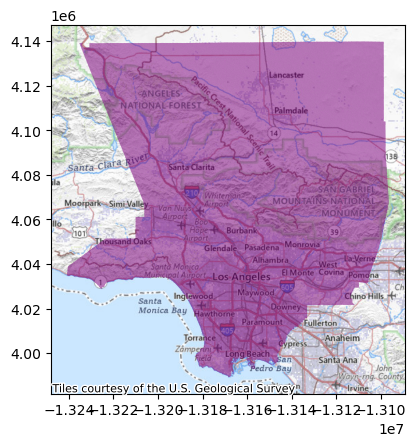

In [13]:
for mode in ["walk", "bike", "drive"]:
    subset = df[df["mode"]==mode].copy()
    gdf = gpd.GeoDataFrame(subset, crs="EPSG:4326").to_crs("EPSG:3857")
    fig, ax = plt.subplots() 
    gdf.plot(ax=ax, alpha=0.7, color="purple")
    ctx.add_basemap(ax=ax, source=ctx.providers.USGS.USTopo)
    fig.savefig(path / f"{mode}.png")

In [ ]:
net_path = Path("/Users/rfitzger/data/laci/tomtom_la_county")
net = pd.read_csv(net_path / "edges-complete.csv.gz")


DataSourceError: '/Users/rfitzger/data/laci/tomtom_la_county/edges-complete.csv.gz' not recognized as being in a supported file format. It might help to specify the correct driver explicitly by prefixing the file path with '<DRIVER>:', e.g. 'CSV:path'.

In [19]:
net["geometry"] = net.geometry.apply(wkt.loads)
net = gpd.GeoDataFrame(net, crs="EPSG:4326")

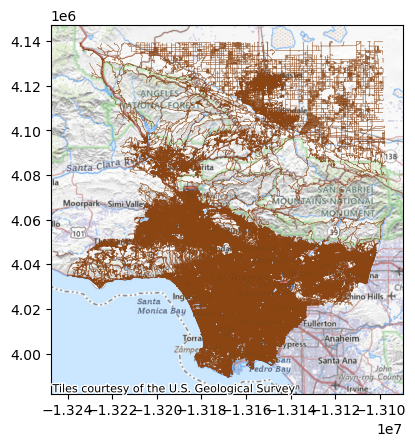

In [23]:
fig, ax = plt.subplots() 
net.to_crs("EPSG:3857").plot(ax=ax, alpha=0.7, color='saddlebrown', linewidth=0.3)
ctx.add_basemap(ax=ax, source=ctx.providers.USGS.USTopo)
# fig.savefig(path / f"{mode}.png")